In [2]:
# Imports and Initial Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
penguins = pd.read_csv("penguins.csv").dropna().reset_index().drop(columns=["Unnamed: 0", "index"])

<AxesSubplot:ylabel='species'>

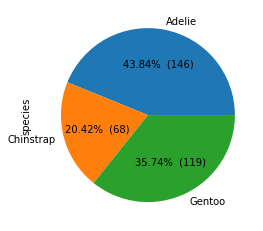

In [3]:
# Species Counts
species = penguins.groupby("species")["species"].count()
species.plot.pie(autopct=lambda countInPercent : "{:.2f}%  ({:,.0f})".format(countInPercent, countInPercent * sum(species)/100))

<AxesSubplot:ylabel='island'>

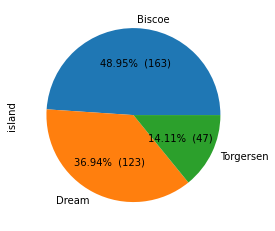

In [4]:
# Island Counts
islands = penguins.groupby("island")["island"].count()
islands.plot.pie(autopct=lambda countInPercent : "{:.2f}%  ({:,.0f})".format(countInPercent, countInPercent * sum(islands)/100))

<AxesSubplot:ylabel='sex'>

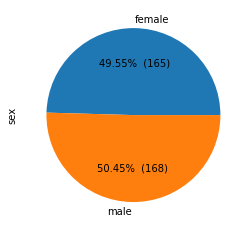

In [5]:
# Sex Counts
sexes = penguins.groupby("sex")["sex"].count()
sexes.plot.pie(autopct=lambda countInPercent : "{:.2f}%  ({:,.0f})".format(countInPercent, countInPercent * sum(sexes)/100))

flipper_length_mm    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

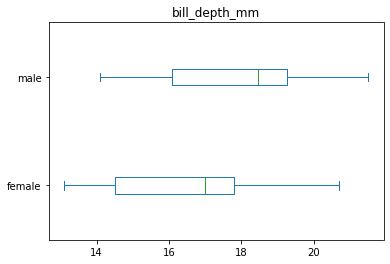

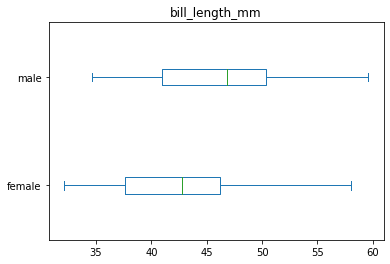

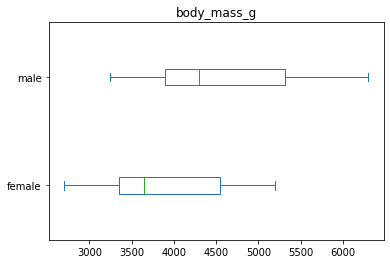

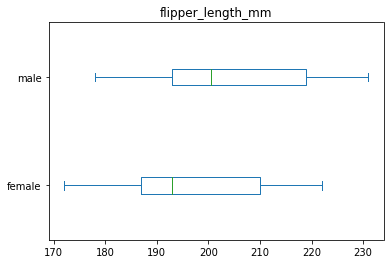

In [6]:
# Male vs Female Comparisons (min, quartil 1, median, quartil 3, max)
penguins.plot.box(vert=False, column="bill_depth_mm", by="sex")
penguins.plot.box(vert=False, column="bill_length_mm", by="sex")
penguins.plot.box(vert=False, column="body_mass_g", by="sex")
penguins.plot.box(vert=False, column="flipper_length_mm", by="sex")

In [7]:
# Average Values
penguins.groupby("sex").mean()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,
female,42.096970,16.425455,197.363636,3862.272727,2008.042424
male,45.854762,17.891071,204.505952,4545.684524,2008.041667


In [8]:
# Standard Deviations (from Average Values)
penguins.groupby("sex").std()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
sex,,,,,
female,4.903476,1.795681,12.500776,666.172050,0.814140
male,5.366896,1.863351,14.547876,787.628884,0.814202


In [9]:
# Correlation Values
penguins.corr()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year
bill_length_mm,1.000000,-0.228626,0.653096,0.589451,0.032657
bill_depth_mm,-0.228626,1.000000,-0.577792,-0.472016,-0.048182
flipper_length_mm,0.653096,-0.577792,1.000000,0.872979,0.151068
body_mass_g,0.589451,-0.472016,0.872979,1.000000,0.021862
year,0.032657,-0.048182,0.151068,0.021862,1.000000


In [10]:
# Correlation Values (within own sex)
penguins.groupby("sex").corr()

bill_length_mm  bill_depth_mm  flipper_length_mm  \
sex                                                                          
female bill_length_mm           1.000000      -0.426380           0.571474   
       bill_depth_mm           -0.426380       1.000000          -0.794167   
       flipper_length_mm        0.571474      -0.794167           1.000000   
       body_mass_g              0.581295      -0.747770           0.884825   
       year                     0.009961      -0.071231           0.145262   
male   bill_length_mm           1.000000      -0.395294           0.662654   
       bill_depth_mm           -0.395294       1.000000          -0.716201   
       flipper_length_mm        0.662654      -0.716201           1.000000   
       body_mass_g              0.476761      -0.755492           0.865499   
       year                     0.057440      -0.033302           0.166553   

                          body_mass_g      year  
sex                                              
female bill_length_mm        0.581295  0.009961  
       bill_depth_mm        -0.747770 -0.071231  
       flipper_length_mm     0.884825  0.145262  
       body_mass_g           1.000000  0.031357  
       year                  0.031357  1.000000  
male   bill_length_mm        0.476761  0.057440  
       bill_depth_mm        -0.755492 -0.033302  
       flipper_length_mm     0.865499  0.166553  
       body_mass_g           1.000000  0.018724  
       year                  0.018724  1.000000

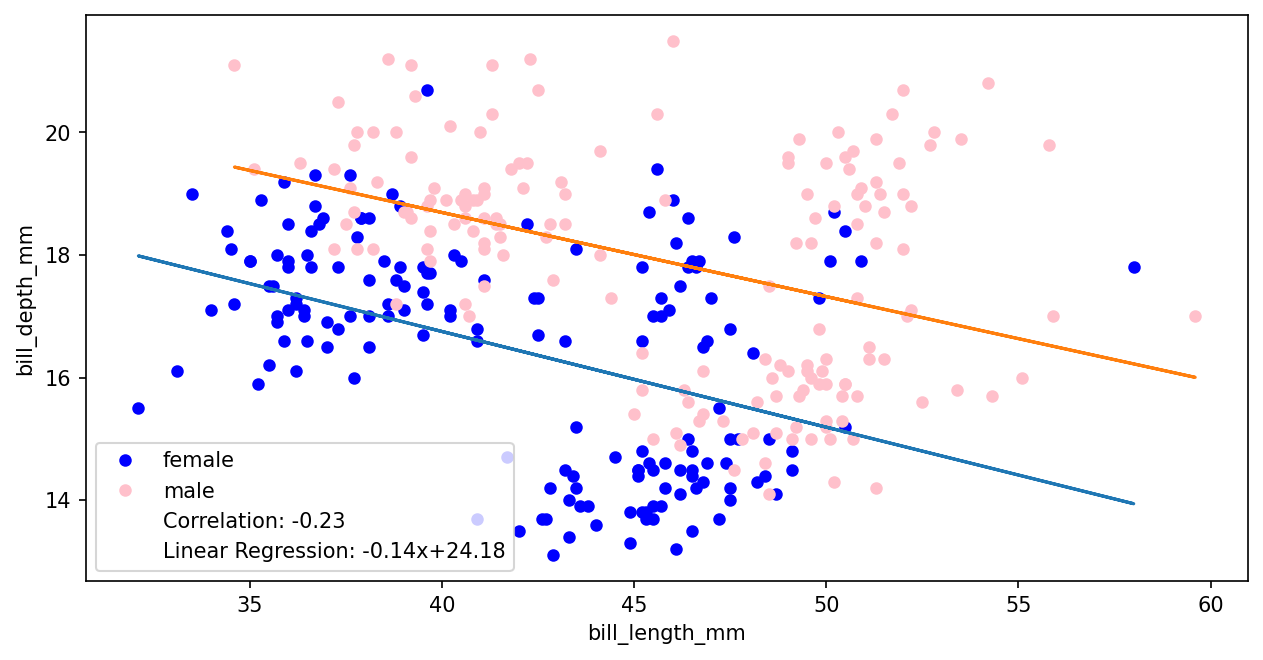

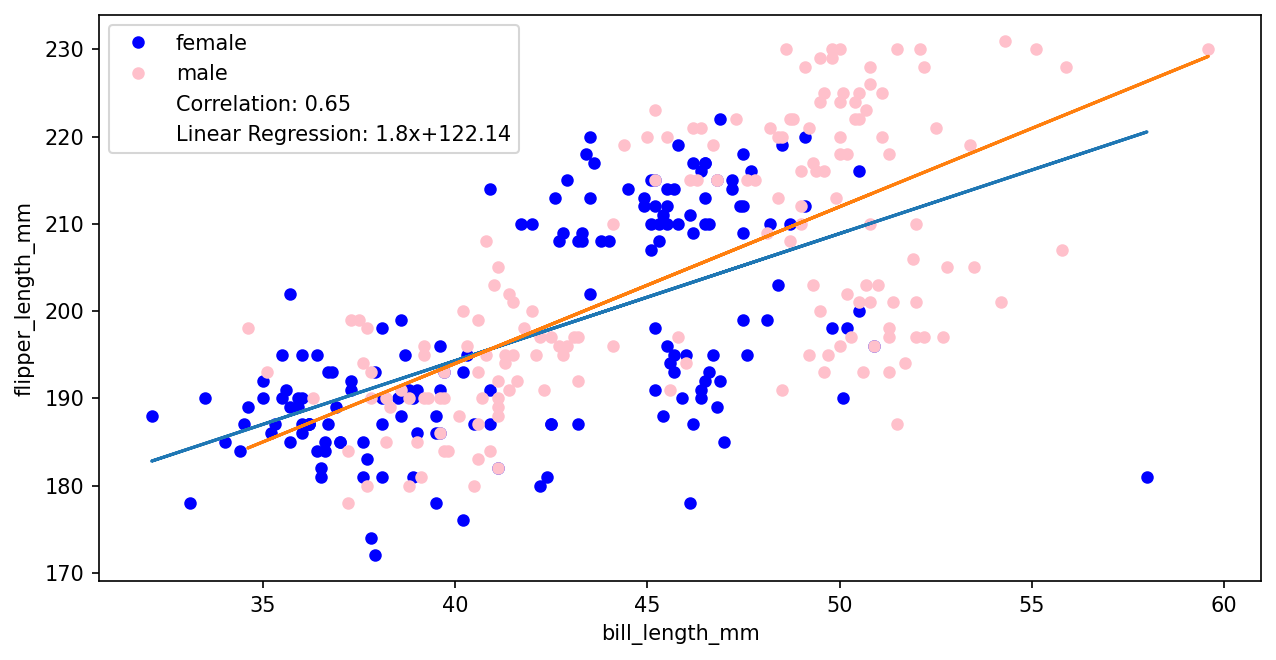

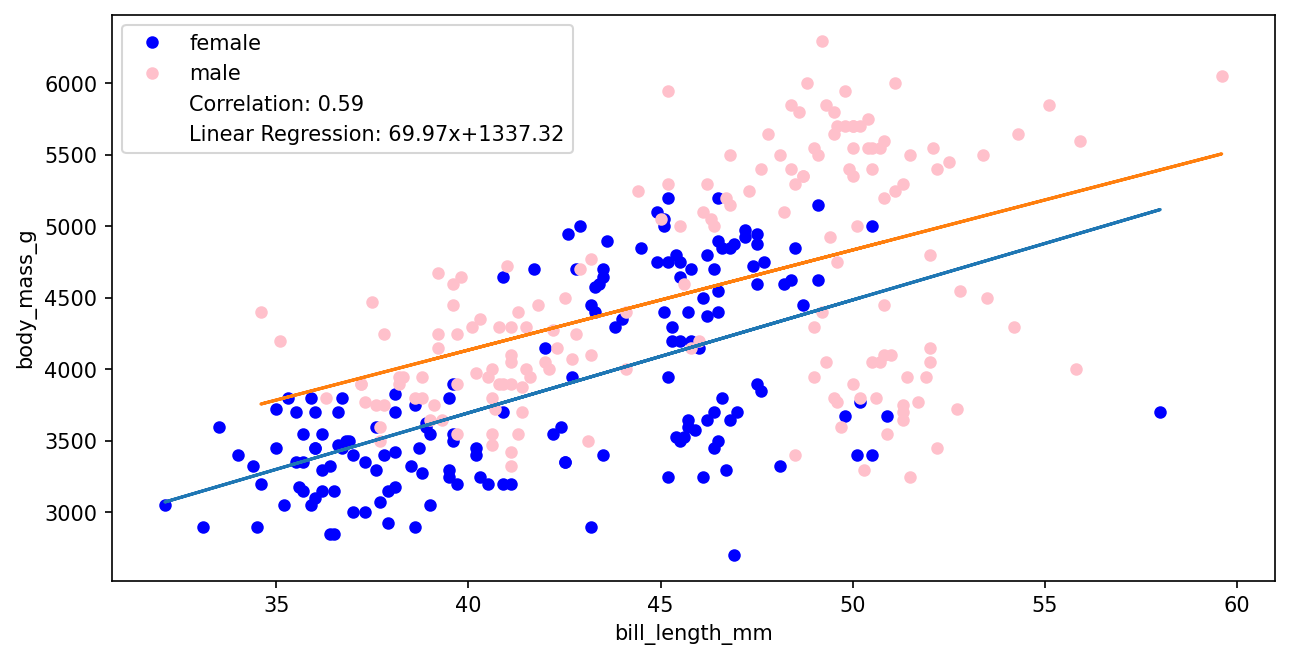

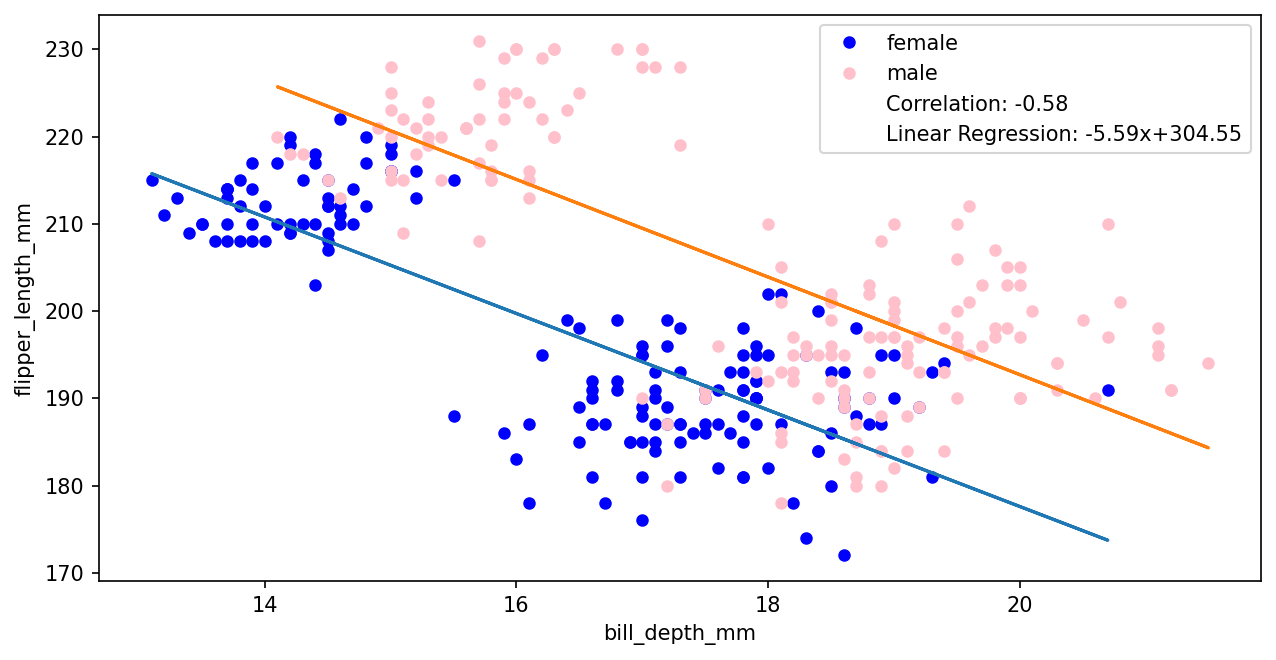

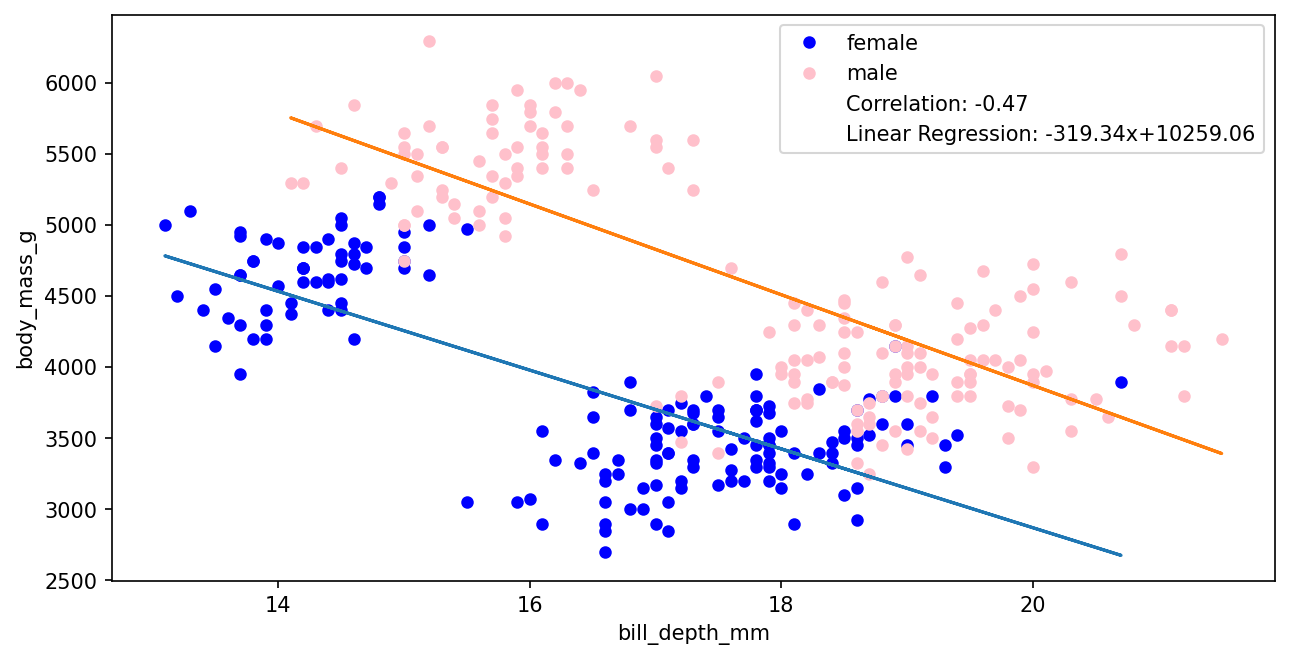

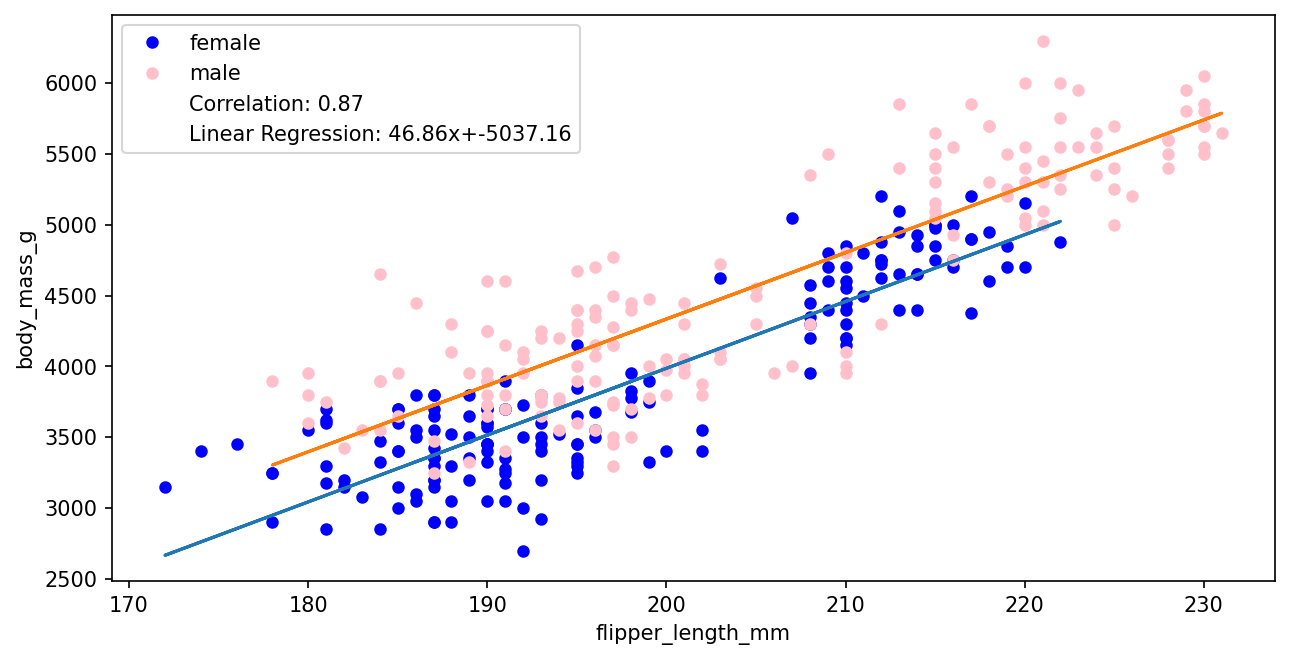

In [21]:
# Correlation Graphics
def scatterBySex(xAxis, yAxis): 
    
    plt.figure(figsize=(10,5), dpi=150)
    # Add Data to Plot
    axes = plt.subplot()
    for sex, group in penguins.groupby("sex"):
        axes.plot(group[xAxis], group[yAxis], marker='o', linestyle='', ms=5, label=sex, color=("#0000FF" if sex == "male" else "#FFC0CB"))

    # Add Linear Regression to Plot
    for sex, group in penguins.groupby("sex"):
        slope, intercept = np.polyfit(group[xAxis], group[yAxis], 1)
        plt.plot(group[xAxis], slope * group[xAxis] + intercept)

    # Add Correlation and Linear Regression
    plt.plot([], [], " ", label="Correlation: " + str(round(penguins[[xAxis, yAxis]].corr().iloc[1, 0], 2)))
    plt.plot([], [], " ", label="Linear Regression: " + str(round(slope, 2)) + "x+" + str(round(intercept, 2)))

    # Add Labels to Plot
    plt.xlabel(xAxis)
    plt.ylabel(yAxis)

    plt.legend()
    plt.show()

scatterBySex("bill_length_mm", "bill_depth_mm")
scatterBySex("bill_length_mm", "flipper_length_mm")
scatterBySex("bill_length_mm", "body_mass_g")
scatterBySex("bill_depth_mm", "flipper_length_mm")
scatterBySex("bill_depth_mm", "body_mass_g")
scatterBySex("flipper_length_mm", "body_mass_g")

flipper_length_mm    AxesSubplot(0.125,0.125;0.775x0.755)
dtype: object

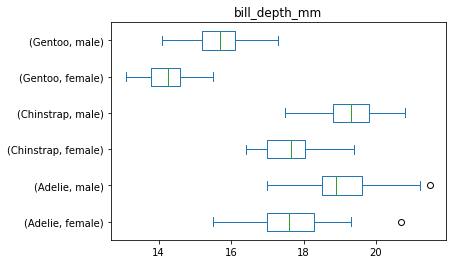

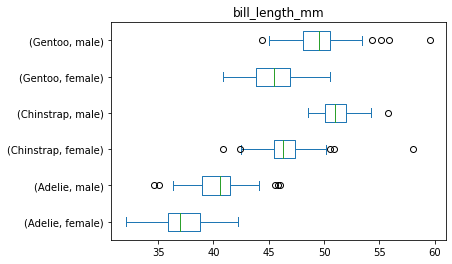

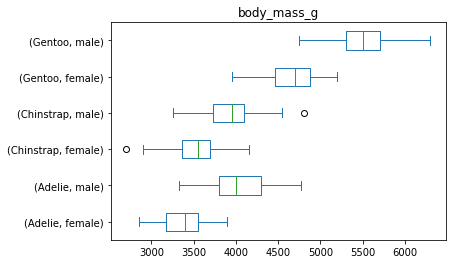

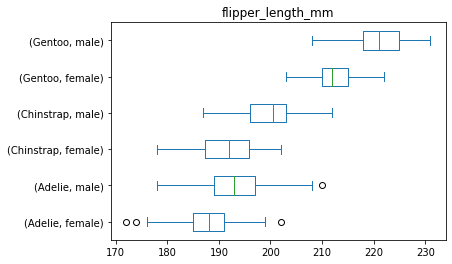

In [12]:
penguins.plot.box(vert=False, column="bill_depth_mm", by=["species", "sex"])
penguins.plot.box(vert=False, column="bill_length_mm", by=["species", "sex"])
penguins.plot.box(vert=False, column="body_mass_g", by=["species", "sex"])
penguins.plot.box(vert=False, column="flipper_length_mm", by=["species", "sex"])